In [1]:
!pip3 install pickle5
import pickle5 as pickle
import pandas as pd

You should consider upgrading via the 'C:\Users\nickh\anaconda3\envs\cm2\python.exe -m pip install --upgrade pip' command.


In [2]:
def load_pickle_file(fname):
    try:
        data = pd.read_pickle(fname)
    except:
        with open(fname, "rb") as fh:
            data = pickle.load(fh)
            data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
    return data

In [10]:
# iemocap1 = load_pickle_file('iemocap_session1_af.pickle')
# iemocap2 = load_pickle_file('iemocap_session2_af.pickle')
# iemocap3 = load_pickle_file('iemocap_session3_af.pickle')
# iemocap4 = load_pickle_file('iemocap_session4_af.pickle')
# iemocap5 = load_pickle_file('iemocap_session5_af.pickle')

iemocap1 = pd.read_csv('iemocap_session1_af.csv')
iemocap1 = iemocap1.loc[:, ~iemocap1.columns.str.contains('^Unnamed')]
iemocap2 = pd.read_csv('iemocap_session2_af.csv')
iemocap2 = iemocap2.loc[:, ~iemocap2.columns.str.contains('^Unnamed')]
iemocap3 = pd.read_csv('iemocap_session3_af.csv')
iemocap3 = iemocap3.loc[:, ~iemocap3.columns.str.contains('^Unnamed')]
iemocap4 = pd.read_csv('iemocap_session4_af.csv')
iemocap4 = iemocap4.loc[:, ~iemocap4.columns.str.contains('^Unnamed')]
iemocap5 = pd.read_csv('iemocap_session5_af.csv')
iemocap5 = iemocap5.loc[:, ~iemocap5.columns.str.contains('^Unnamed')]

In [11]:
print(len(iemocap1))
print(len(iemocap2))
print(len(iemocap3))
print(len(iemocap4))
print(len(iemocap5))
len(iemocap1) + len(iemocap2) + len(iemocap3) + len(iemocap4) + len(iemocap5)

1819
1762
1760
1865
2170


9376

In [12]:
acoustic_feature_columns = [c for c in iemocap1.columns][5:]

In [13]:
iemocap1

TURN  \
0        Ses01F_impro01_F000   
1        Ses01F_impro01_M000   
2        Ses01F_impro01_F001   
3        Ses01F_impro01_M001   
4        Ses01F_impro01_F002   
...                      ...   
1814  Ses01M_script03_2_F040   
1815  Ses01M_script03_2_M041   
1816  Ses01M_script03_2_F041   
1817  Ses01M_script03_2_M042   
1818  Ses01M_script03_2_M043   

                                              UTTERANCE   DA EMOTION  \
0                                            Excuse me.    c     neu   
1                               Do you have your forms?    q     fru   
2                                                 Yeah.  ans     neu   
3                                      Let me see them.    s     fru   
4                                   Is there a problem?    q     neu   
...                                                 ...  ...     ...   
1814  This is the end do you hear me?  Finally and f...    s     ang   
1815                        You're not going like this.    c     ang   
1816  Oh yes I am...Oh yes I am. Let go of me. You l...    o     ang   
1817                                     No you're not.  dag     ang   
1818  Shut up. Shut up. I wouldn't marry you again i...    o     ang   

                  audio_file  F0semitoneFrom27.5Hz_sma3nz_amean_b  \
0        Ses01F_impro01_F000                             0.000000   
1        Ses01F_impro01_M000                             0.000000   
2        Ses01F_impro01_F001                             0.000000   
3        Ses01F_impro01_M001                            26.122112   
4        Ses01F_impro01_F002                             0.000000   
...                      ...                                  ...   
1814  Ses01M_script03_2_F040                            32.384240   
1815  Ses01M_script03_2_M041                             0.000000   
1816  Ses01M_script03_2_F041                            40.590290   
1817  Ses01M_script03_2_M042                            31.108418   
1818  Ses01M_script03_2_M043                            46.032696   

      F0semitoneFrom27.5Hz_sma3nz_stddevNorm_b  \
0                                     0.000000   
1                                     0.000000   
2                                     0.000000   
3                                     0.032891   
4                                     0.000000   
...                                        ...   
1814                                  0.081119   
1815                                  0.000000   
1816                                  0.169796   
1817                                  0.012443   
1818                                  0.099883   

      F0semitoneFrom27.5Hz_sma3nz_percentile20.0_b  \
0                                         0.000000   
1                                         0.000000   
2                                         0.000000   
3                                        26.099644   
4                                         0.000000   
...                                            ...   
1814                                     30.534610   
1815                                      0.000000   
1816                                     34.144410   
1817                                     30.754486   
1818                                     43.077580   

      F0semitoneFrom27.5Hz_sma3nz_percentile50.0_b  \
0                                         0.000000   
1                                         0.000000   
2                                         0.000000   
3                                        26.244362   
4                                         0.000000   
...                                            ...   
1814                                     31.911644   
1815                                      0.000000   
1816                                     40.024890   
1817                                     30.995090   
1818                                     45.162704   

      F0semitoneFrom27.5Hz_sma3nz_percentile80

In [14]:
# Get the DA labels
da_labels_iemocap1 = iemocap1['DA']
da_labels_iemocap2 = iemocap2['DA']
da_labels_iemocap3 = iemocap3['DA']
da_labels_iemocap4 = iemocap4['DA']
da_labels_iemocap5 = iemocap5['DA']

# Emotion labels
emot_labels_iemocap1 = iemocap1['EMOTION']
emot_labels_iemocap2 = iemocap2['EMOTION']
emot_labels_iemocap3 = iemocap3['EMOTION']
emot_labels_iemocap4 = iemocap4['EMOTION']
emot_labels_iemocap5 = iemocap5['EMOTION']

In [15]:
# Get a sense of the value counts for the data
full_da_labels = pd.concat([da_labels_iemocap1, da_labels_iemocap2, da_labels_iemocap3, da_labels_iemocap4, da_labels_iemocap5])
full_da_labels.value_counts()

s      2170
o      2073
q      1945
ans    1429
ag      497
dag     372
c       350
b       284
ap       75
oth      68
g        59
a        54
Name: DA, dtype: int64

In [16]:
full_emot_data = pd.concat([emot_labels_iemocap1, emot_labels_iemocap2, emot_labels_iemocap3, emot_labels_iemocap4, emot_labels_iemocap5])
full_emot_data.value_counts()

xxx    2305
fru    1714
neu    1613
ang    1034
sad    1011
exc     999
hap     563
sur      94
fea      38
oth       3
dis       2
Name: EMOTION, dtype: int64

In [17]:
# Turn code into categorical data
# Create one hot embeddings of the label values (0, 1, 2)
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing
import numpy as np

# Full set of dialogue act labels
da_labels = ['s', 'q', 'o', 'ans', 'c', 'ag', 'b', 'dag', 'oth', 'a', 'ap', 'g']
da_encoder = preprocessing.LabelEncoder()
da_encoder.fit(da_labels)

emotion_labels = ['xxx', 'fru', 'neu', 'ang', 'sad', 'exc', 'hap', 'sur', 'fea', 'oth', 'dis']
emotion_encoder = preprocessing.LabelEncoder()
emotion_encoder.fit(emotion_labels)

def convert_da_labels_to_categorical(dialog_acts):
    num_labels = da_encoder.transform(dialog_acts)
    cat_labels = to_categorical(num_labels)
    return cat_labels

def convert_cat_da_to_string(cat_das):
    num_labels = np.argmax(cat_das, axis=-1)
    return da_encoder.inverse_transform(num_labels)

def convert_emot_labels_to_categorical(emot_data):
    num_labels = emotion_encoder.transform(emot_data)
    cat_labels = to_categorical(num_labels)
    return cat_labels

def convert_cat_emot_to_string(cat_emot_data):
    num_labels = np.argmax(cat_emot_data, axis=-1)
    return emotion_encoder.inverse_transform(num_labels)

In [18]:
print(da_labels_iemocap1[0])
cat_1_labels = convert_da_labels_to_categorical(da_labels_iemocap1)
print(cat_1_labels[0])
string_das = convert_cat_da_to_string(cat_1_labels)
print(string_das[0])

print(emot_labels_iemocap1[0])
cat_1_emot_labels = convert_emot_labels_to_categorical(emot_labels_iemocap1)
print(cat_1_emot_labels[0])
string_emot = convert_cat_emot_to_string(cat_1_emot_labels)
print(string_emot[0])

c
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
c
neu
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
neu


In [19]:
X = iemocap2[acoustic_feature_columns].to_numpy()
y_da = convert_da_labels_to_categorical(iemocap2['DA'])
y_emot = convert_emot_labels_to_categorical(iemocap2['EMOTION'])

In [61]:
from keras import layers, Input, Model, Sequential
from tensorflow.python.keras.layers.core import Dropout
from tensorflow.keras.callbacks import EarlyStopping

def build_and_train_model(X, y_da):
    callback = EarlyStopping(monitor='loss', patience=5)
    model = Sequential()
    model.add(layers.Dense(256, input_dim=X.shape[1], activation='relu'))
    model.add(Dropout(0.1))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(len(y_da[0]), activation="softmax"))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X, y_da, batch_size=32, epochs=100, validation_split=0.2, callbacks=[callback])
    return (model, history)

In [62]:
build_and_train_model(X, y_da)

Epoch 1/100
189/189 [==============================] - 0s 1ms/step - loss: 56.4021 - accuracy: 0.1902 - val_loss: 15.3711 - val_accuracy: 0.2526
Epoch 2/100
189/189 [==============================] - 0s 1ms/step - loss: 9.9808 - accuracy: 0.1929 - val_loss: 23.6678 - val_accuracy: 0.2242
Epoch 3/100
189/189 [==============================] - 0s 1ms/step - loss: 3.5629 - accuracy: 0.1735 - val_loss: 19.2215 - val_accuracy: 0.2070
Epoch 4/100
189/189 [==============================] - 0s 1ms/step - loss: 2.6921 - accuracy: 0.2253 - val_loss: 12.0347 - val_accuracy: 0.2083
Epoch 5/100
189/189 [==============================] - 0s 1ms/step - loss: 2.1805 - accuracy: 0.2323 - val_loss: 15.0707 - val_accuracy: 0.2057
Epoch 6/100
189/189 [==============================] - 0s 1ms/step - loss: 1.9934 - accuracy: 0.2376 - val_loss: 14.2382 - val_accuracy: 0.2077
Epoch 7/100
189/189 [==============================] - 0s 1ms/step - loss: 1.9522 - accuracy: 0.2420 - val_loss: 11.3156 - val_accuracy

(<keras.engine.sequential.Sequential at 0x2af8792d5c8>,
 <keras.callbacks.History at 0x2af89baa9c8>)

In [83]:
preds = model1.predict(X)

#preds = [np.argmax(pred) for pred in preds]
#pd.DataFrame(data=np.array(preds)).value_counts()

np.argmax(preds, axis=-1)

array([6, 8, 6, ..., 0, 2, 2], dtype=int64)

In [24]:
X.shape

(1762, 264)

In [27]:
# create train/test fold assignments

tr1 = pd.concat([iemocap1, iemocap2, iemocap3, iemocap4])
te1 = iemocap5

tr2 = pd.concat([iemocap1, iemocap2, iemocap3, iemocap5])
te2 = iemocap4

tr3 = pd.concat([iemocap1, iemocap2, iemocap4, iemocap5])
te3 = iemocap3

tr4 = pd.concat([iemocap1, iemocap3, iemocap4, iemocap5])
te4 = iemocap2

tr5 = pd.concat([iemocap2, iemocap3, iemocap4, iemocap5])
te5 = iemocap1

splits = [(tr1, te1), (tr2, te2), (tr3, te3), (tr4, te4), (tr5, te5)]

In [99]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

precision_scores = []
recall_scores = []
f1_scores = []

y_true = []
y_pred = []

for s in splits:
    tr, te = s
    X_train = tr[acoustic_feature_columns].to_numpy()
    y_train = convert_da_labels_to_categorical(tr['DA'])
    X_test = te[acoustic_feature_columns].to_numpy()
    y_test = convert_da_labels_to_categorical(te['DA'])
    model, history = build_and_train_model(X_train, y_train)
    
    preds = np.argmax(model.predict(X_test), axis=1)
    y_uni = np.argmax(y_test, axis=1)
    
    y_pred += preds.tolist()
    y_true += y_uni.tolist()
    
    p = precision_score(y_uni, preds, average='micro')
    r = recall_score(y_uni, preds, average='micro')
    f1 = f1_score(y_uni, preds, average='micro')
    
    precision_scores.append(p)
    recall_scores.append(r)
    f1_scores.append(f1)

Epoch 1/100
181/181 [==============================] - 0s 2ms/step - loss: 56.2348 - accuracy: 0.1855 - val_loss: 8.7620 - val_accuracy: 0.2254
Epoch 2/100
181/181 [==============================] - 0s 1ms/step - loss: 4.8024 - accuracy: 0.2071 - val_loss: 3.4275 - val_accuracy: 0.2469
Epoch 3/100
181/181 [==============================] - 0s 1ms/step - loss: 2.6345 - accuracy: 0.2361 - val_loss: 3.0733 - val_accuracy: 0.2476
Epoch 4/100
181/181 [==============================] - 0s 1ms/step - loss: 2.2679 - accuracy: 0.2403 - val_loss: 2.9988 - val_accuracy: 0.2483
Epoch 5/100
181/181 [==============================] - 0s 1ms/step - loss: 2.1879 - accuracy: 0.2380 - val_loss: 2.8970 - val_accuracy: 0.2476
Epoch 6/100
181/181 [==============================] - 0s 1ms/step - loss: 2.1224 - accuracy: 0.2384 - val_loss: 2.8514 - val_accuracy: 0.2476
Epoch 7/100
181/181 [==============================] - 0s 1ms/step - loss: 2.0709 - accuracy: 0.2387 - val_loss: 2.7076 - val_accuracy: 0.248

Epoch 33/100
188/188 [==============================] - 0s 1ms/step - loss: 1.9556 - accuracy: 0.2327 - val_loss: 2.4574 - val_accuracy: 0.2063
Epoch 34/100
188/188 [==============================] - 0s 1ms/step - loss: 1.9552 - accuracy: 0.2329 - val_loss: 2.5865 - val_accuracy: 0.2063
Epoch 35/100
188/188 [==============================] - 0s 1ms/step - loss: 1.9561 - accuracy: 0.2329 - val_loss: 2.2540 - val_accuracy: 0.2063
Epoch 36/100
188/188 [==============================] - 0s 1ms/step - loss: 1.9569 - accuracy: 0.2332 - val_loss: 2.5273 - val_accuracy: 0.2063
Epoch 37/100
188/188 [==============================] - 0s 1ms/step - loss: 1.9568 - accuracy: 0.2329 - val_loss: 2.5686 - val_accuracy: 0.2063
Epoch 38/100
188/188 [==============================] - 0s 1ms/step - loss: 1.9561 - accuracy: 0.2327 - val_loss: 2.5658 - val_accuracy: 0.2063
Epoch 39/100
188/188 [==============================] - 0s 1ms/step - loss: 1.9577 - accuracy: 0.2325 - val_loss: 2.4997 - val_accuracy:

Epoch 24/100
191/191 [==============================] - 0s 1ms/step - loss: 1.9960 - accuracy: 0.2384 - val_loss: 6.5588 - val_accuracy: 0.2055
Epoch 25/100
191/191 [==============================] - 0s 1ms/step - loss: 1.9291 - accuracy: 0.2387 - val_loss: 6.7068 - val_accuracy: 0.2055
Epoch 26/100
191/191 [==============================] - 0s 1ms/step - loss: 1.9267 - accuracy: 0.2381 - val_loss: 3.7629 - val_accuracy: 0.2068
Epoch 27/100
191/191 [==============================] - 0s 1ms/step - loss: 1.9268 - accuracy: 0.2384 - val_loss: 4.8065 - val_accuracy: 0.2068
Epoch 28/100
191/191 [==============================] - 0s 1ms/step - loss: 1.9235 - accuracy: 0.2382 - val_loss: 4.2733 - val_accuracy: 0.2068
Epoch 29/100
191/191 [==============================] - 0s 1ms/step - loss: 1.9255 - accuracy: 0.2384 - val_loss: 5.3274 - val_accuracy: 0.2068
Epoch 30/100
191/191 [==============================] - 0s 1ms/step - loss: 1.9240 - accuracy: 0.2385 - val_loss: 5.3188 - val_accuracy:

In [101]:
results = pd.DataFrame(data=zip(precision_scores, recall_scores, f1_scores), columns=['Precision', 'Recall', 'F1'])
results

Precision    Recall        F1
0   0.205991  0.205991  0.205991
1   0.251475  0.251475  0.251475
2   0.236932  0.236932  0.236932
3   0.242338  0.242338  0.242338
4   0.224299  0.224299  0.224299

In [91]:
results.describe()

Precision    Recall        F1
count   5.000000  5.000000  5.000000
mean    0.247325  0.247325  0.247325
std     0.025091  0.025091  0.025091
min     0.205991  0.205991  0.205991
25%     0.242441  0.242441  0.242441
50%     0.257094  0.257094  0.257094
75%     0.261932  0.261932  0.261932
max     0.269169  0.269169  0.269169

In [105]:
from sklearn.metrics import classification_report, confusion_matrix

cr = classification_report(y_true, y_pred)
print(cr)

cm = confusion_matrix(y_true, y_pred)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       0.00      0.00      0.00       497
           2       0.18      0.00      0.00      1429
           3       0.00      0.00      0.00        75
           4       0.00      0.00      0.00       284
           5       0.00      0.00      0.00       350
           6       0.00      0.00      0.00       372
           7       0.00      0.00      0.00        59
           8       0.08      0.00      0.00      2073
           9       0.17      0.04      0.07        68
          10       0.11      0.00      0.00      1945
          11       0.23      0.99      0.38      2170

    accuracy                           0.23      9376
   macro avg       0.06      0.09      0.04      9376
weighted avg       0.12      0.23      0.09      9376



C:\Users\nickh\anaconda3\envs\cm2\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nickh\anaconda3\envs\cm2\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nickh\anaconda3\envs\cm2\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


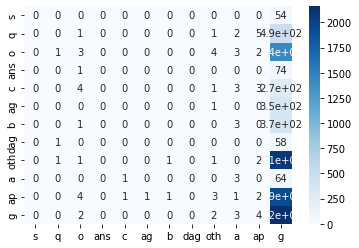

In [106]:
import seaborn as sn

df_cm = pd.DataFrame(cm, index=da_labels, columns=da_labels)

ax = sn.heatmap(df_cm, cmap='Blues', annot=True)

In [109]:
pd.DataFrame(y_true).value_counts()

11    2170
8     2073
10    1945
2     1429
1      497
6      372
5      350
4      284
3       75
9       68
7       59
0       54
dtype: int64

In [110]:
pd.DataFrame(y_pred).value_counts()

11    9302
9       18
10      18
2       17
8       13
1        3
4        2
6        2
5        1
dtype: int64